Homework 5
Due 4/28/2022

For Homework 5, you will be building a neural network. You get a couple of options for what you would like to do. For some of this, running it on google colab might be easier, so consider running it there. Your options are detailed below.

Names:
-
-
-
-

1. Using the fashion_mnist dataset, which is a dataset of 10 different articles of clothing, build a Neural Network to label clothing articles. Your goal would be to get the highest accuracy possible for labeling clothing. If you choose this option, your maximum score is a 90% on this assignment, and you must work alone.
2. Using the imdb dataset, classify movie reviews as either being positive or negative. This will be a bit more challenging, as you might want to employ some NLP or be more creative with how you build your model. If you pick this option, you may work in a group (of up to 4 total people), and earn a maximum of 100%.
3. Using the "Audio MNIST" dataset, classify digits as a number from 0-9. Your data is audio files with different people saying different numbers. If you choose this assignment, your maximum score is 130%, and you may work work in a group (of up to 4 total people). This data and code come from a Kaggle competition, and it has data in a form that will need to be processed (it has some scripts provided but they aren't everything you will need). https://www.kaggle.com/datasets/alanchn31/free-spoken-digits

Sample code below is provided for getting started on fashion_mnist, and imdb. The audio files, as well as some scripts to help you take those audio files and organize them has been provided.  

In [16]:
# Option 1. Fashion dataset.
import tensorflow as tf
import numpy as np
#fashion = tf.keras.datasets.fashion_mnist.load_data()

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [17]:


#The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. 
#The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing
#the image represents: 0-9

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


#Each image is mapped to a single label. Since the class names are not included with the dataset, 
#store them here to use later when plotting the images:
print(train_images.shape)
print(len(train_labels))
print(test_images.shape)


(60000, 28, 28)
60000
(10000, 28, 28)


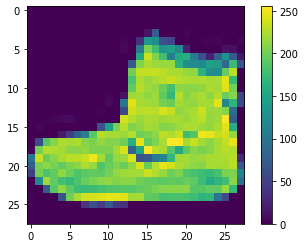

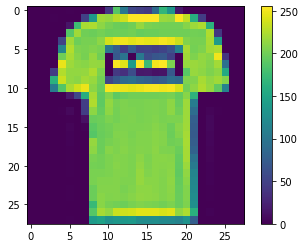

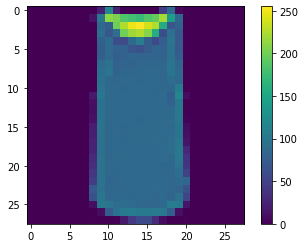

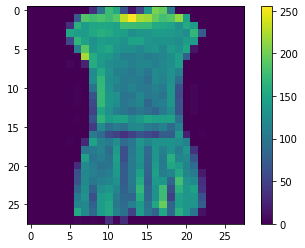

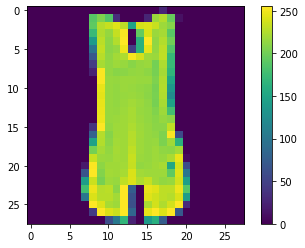

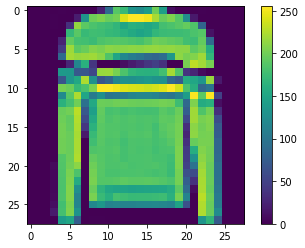

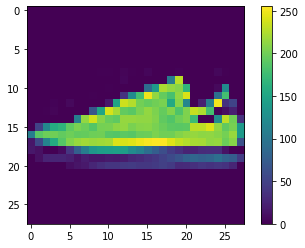

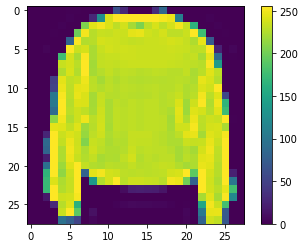

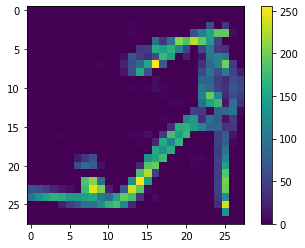

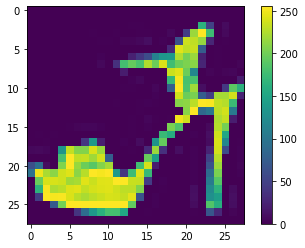

In [18]:
import matplotlib.pyplot as plt
plt.figure()
for i in range(10):
    plt.imshow(train_images[i])
    plt.colorbar()
    plt.grid(False)
    plt.show()

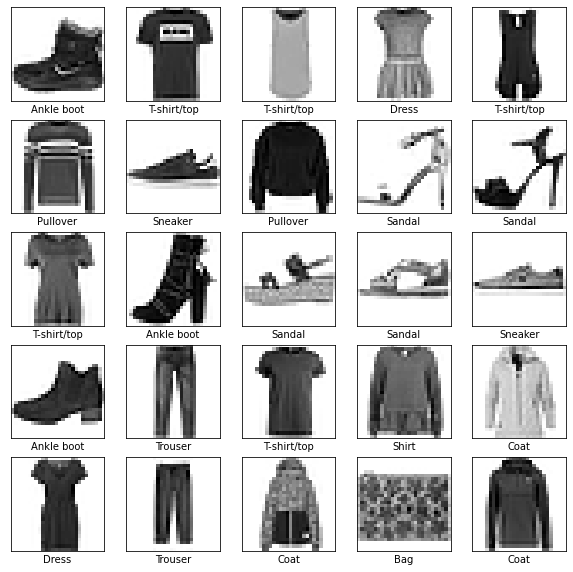

In [19]:
train_images = train_images / 255.0

test_images = test_images / 255.0


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

"""
    Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
    Optimizer —This is how the model is updated based on the data it sees and its loss function.
    Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.
"""

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [21]:
#feed training data: train_images, train_labels
# The models learns to associate images and labels
#  Ask the model to make predictions about a test set: test_images
#   Verify that the predictions match the labels from test_labels
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4948 - accuracy: 0.8262
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3710 - accuracy: 0.8666
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3357 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3084 - accuracy: 0.8868
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2943 - accuracy: 0.8912
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2787 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2670 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2540 - accuracy: 0.9059
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2465 - accuracy: 0.9088
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.237

In [22]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3305 - accuracy: 0.8872 - 472ms/epoch - 2ms/step

Test accuracy: 0.8871999979019165


In [23]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])


In [24]:
predictions = probability_model.predict(test_images)
predictions[0]

array([2.3587884e-07, 4.6847742e-07, 1.7792760e-07, 1.8340073e-10,
       1.7442554e-08, 1.9151956e-02, 8.0293728e-07, 1.0527812e-01,
       2.3447137e-06, 8.7556595e-01], dtype=float32)

In [25]:
np.argmax(predictions[0])
test_labels[0]

9

In [26]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


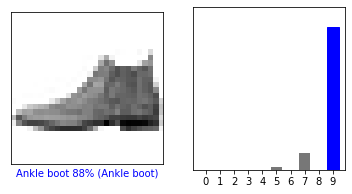

In [27]:
for i in range(1):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i],  test_labels)
    plt.show()

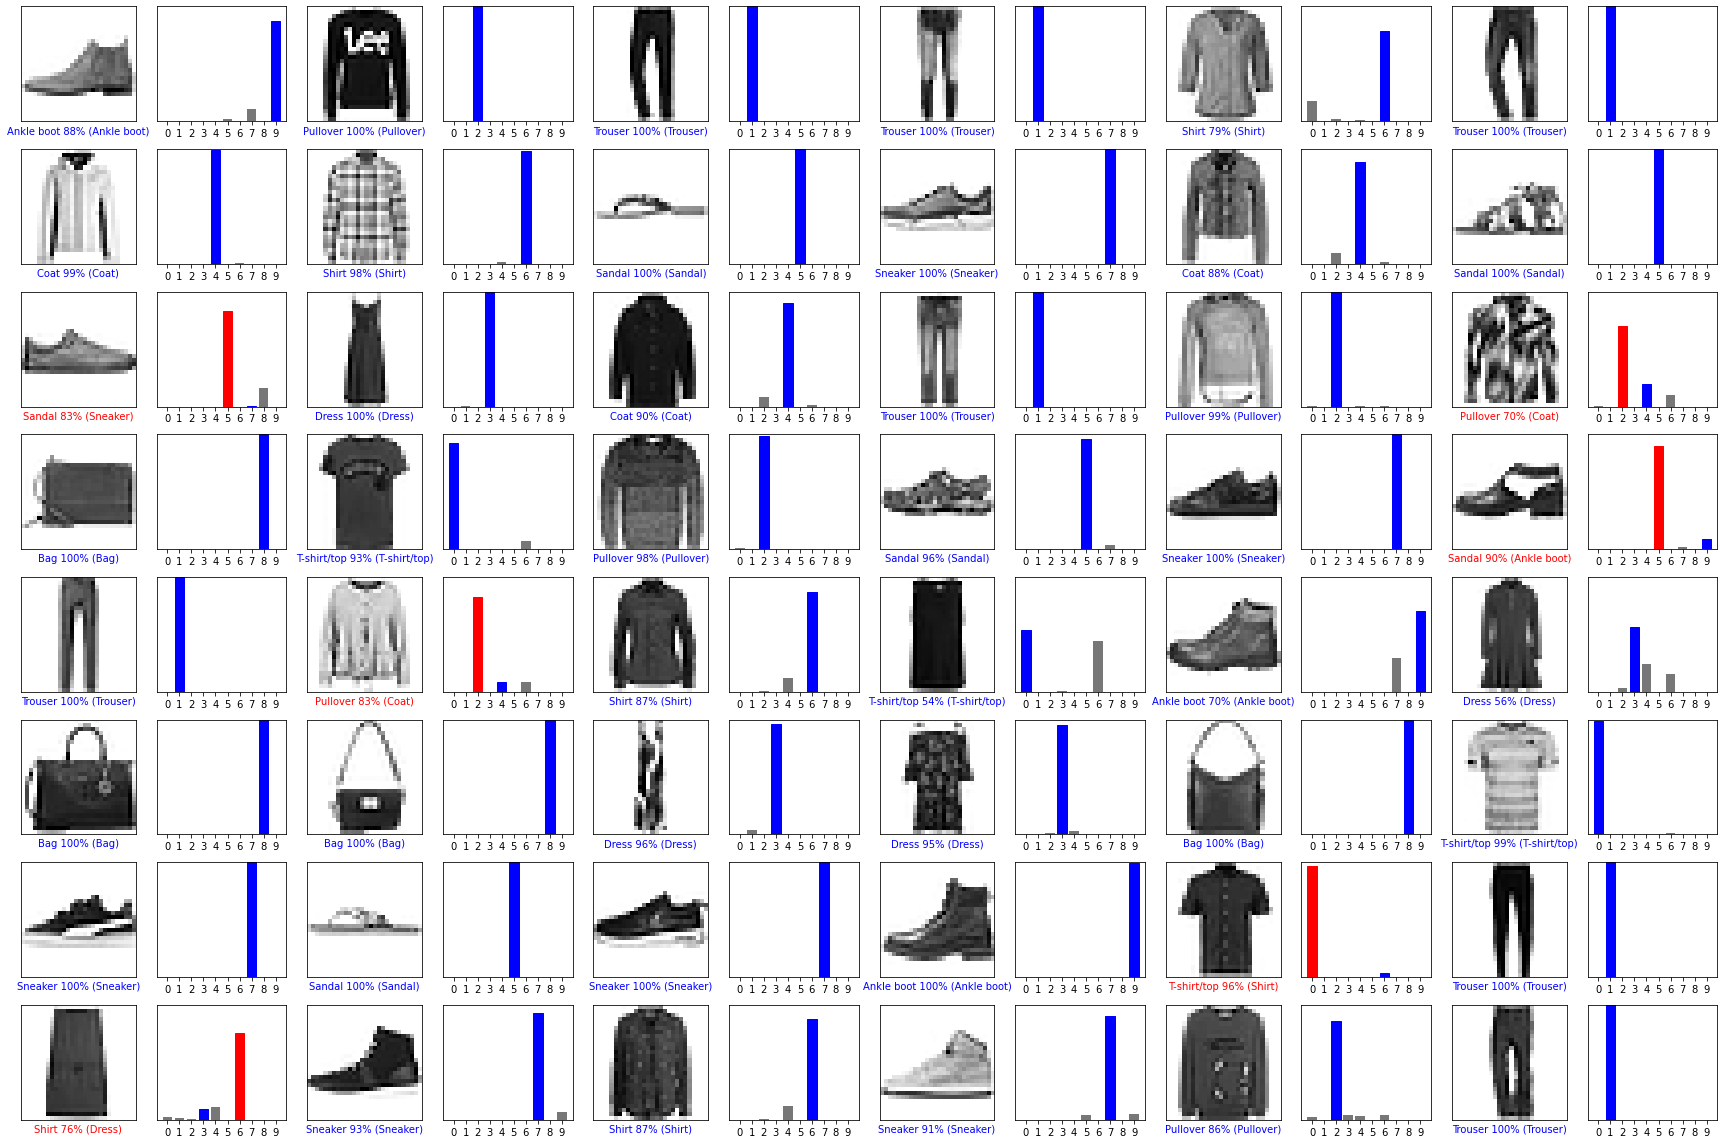

In [28]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 8
num_cols = 6
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


(28, 28)
(1, 28, 28)
[[2.3091867e-05 1.0784099e-12 9.9947089e-01 1.0725347e-09 4.7361286e-04
  2.7171295e-18 3.2370026e-05 2.9099141e-23 4.3213236e-10 1.2515484e-15]]


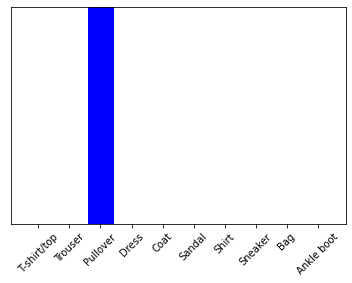

2

In [29]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = probability_model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()
np.argmax(predictions_single[0])


# MIT License
#
# Copyright (c) 2017 François Chollet
#

In [31]:
# Option 2. imdb 
import os
import numpy as np

import tensorflow as tf
#import tensorflow_hub as hub # These imports will not work unless you've already installed them locally. Colab has them ready.
import tensorflow_datasets as tfds

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)


# Split the training set into 60% and 40% to end up with 15,000 examples
# for training, 10,000 examples for validation and 25,000 examples for testing.
train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews", 
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)

train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))
print(train_examples_batch)
print(train_labels_batch) # 0 is a negative review, 1 is a positive review


ModuleNotFoundError: No module named 'tensorflow_datasets'

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [ ]:
train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews", 
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)

train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))
print(train_examples_batch)
print(train_labels_batch) # 0 is a negative review, 1 is a positive review


In [ ]:
print(train_data[0])
#Decode review method

word_index = imdb.get_word_index()
    #Reverses it, mapping integer indices to words
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
    #Decodes the review. Index buffer offset by 3 bc 0,1,and 2 are reserved indicies for 'padding', 'start of sequence', and 'unknown'
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)


In [ ]:
# Encoding the integer sequences into a binary matrix

def vectorize_sequences(sequences, dimensions=10000):
    # creates an all zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), 10000))
    
    # sets specific indices of results[i] to 1s
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results


#Vectorized versions
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(x_train)

#Vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
from keras import models
from keras import layers

# The Model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
# Compiling the model

model.compile(optimizer= 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
# Customize and Configure the optimizer, metrics and losses

from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer= tf.keras.optimizers.RMSprop(learning_rate=0.001), 
              loss = 'binary_crossentropy',
              metrics = [metrics.binary_accuracy])


model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics = [metrics.binary_crossentropy])

In [ ]:
#Validation Set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
# TRAIN the model

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu' ))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop', loss= 'binary_crossentropy', metrics= ['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

In [ ]:
# Option 3. Audio mnist

# Good luck~